<a href="https://colab.research.google.com/github/jcs-lambda/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def mean(lst):
  assert len(lst) > 0, 'list of values must not be empty'
  total = 0
  for x in lst:
    total += x
  return total / len(lst)

def sample_variance(lst):
  assert len(lst) > 1, 'list must contain at least two values'
  list_mean = mean(lst)
  squared_difference_from_mean = [(x - list_mean)**2 for x in lst]
  total = 0
  for x in squared_difference_from_mean:
    total += x
  return total / (len(lst) - 1)

def sample_standard_deviation(lst):
  assert len(lst) > 0, 'list of values must not be empty'
  return sample_variance(lst)**.5

In [0]:
last_week_sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

m_sv_ssd = {'mine':[mean(last_week_sales), sample_variance(last_week_sales), sample_standard_deviation(last_week_sales)],
            'numpy':[np.mean(last_week_sales), np.var(last_week_sales, ddof=1), np.std(last_week_sales, ddof=1)],
            'pandas':[pd.Series(last_week_sales).mean(), pd.Series(last_week_sales).var(ddof=1), pd.Series(last_week_sales).std(ddof=1)],
            'statistics':[stats.mean(last_week_sales), stats.variance(last_week_sales), stats.stdev(last_week_sales,)]}

print('Last Week Sales')
pd.DataFrame.from_dict(m_sv_ssd, orient='index', columns=['mean', 'sample variance', 'sample standard deviation'])


Last Week Sales


,mean,sample variance,sample standard deviation
mine,3052.714286,214387.904762,463.020415
numpy,3052.714286,214387.904762,463.020415
pandas,3052.714286,214387.904762,463.020415
statistics,3052.000000,214387.000000,463.019438


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

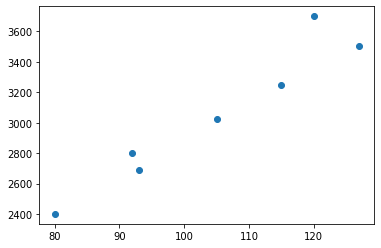

In [0]:
plt.scatter(last_week_customers, last_week_sales)
plt.show()

In [0]:
last_week_customers = np.array([127, 80, 105, 92, 120, 115, 93])

covariant_last_week_sales_customers = np.cov(last_week_sales, last_week_customers, ddof=1,)
covariant_last_week_sales_customers

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [0]:
sales_and_customers = {'Last_Week_Sales':last_week_sales, 'Last_Week_Customers':last_week_customers}
sales_customers_df = pd.DataFrame(sales_and_customers)
print('Covariant matrix sales and customers')
sales_customers_df.cov()

Covariant matrix sales and customers


,Last_Week_Sales,Last_Week_Customers
Last_Week_Sales,214387.904762,7604.357143
Last_Week_Customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
stdev_customers = sample_standard_deviation(last_week_customers)
stdev_sales = sample_standard_deviation(last_week_sales)

corr_sales_sales = covariant_last_week_sales_customers[0][0] / ( stdev_sales * stdev_sales)
corr_sales_cust = covariant_last_week_sales_customers[0][1] / ( stdev_sales * stdev_customers)

correlation_coefficients = np.array([[corr_sales_sales, corr_sales_cust],
                                     [corr_sales_cust, corr_sales_sales] ])
correlation_coefficients

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [0]:
sales_customers_df.corr()

,Last_Week_Sales,Last_Week_Customers
Last_Week_Sales,1.000000,0.962834
Last_Week_Customers,0.962834,1.000000


In [0]:
np.corrcoef(last_week_sales, last_week_customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0, na_values='NA')
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [0]:
titanic_df.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
#@title covariant matrix
titanic_df_numeric = titanic_df.select_dtypes(include='number')
titanic_df_numeric.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
#@title correlation matrix
titanic_df_numeric.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

synonym for orthogonal - perpendicular

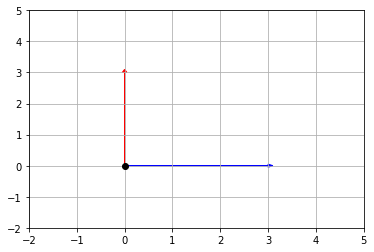

In [0]:
v1 = np.array([0, 3])
v2 = np.array([3, 0])

plt.arrow(0.0, 0.0, v1[0], v1[1], head_width=0.1, head_length=0.1, color='red')
plt.arrow(0.0, 0.0, v2[0], v2[1], head_width=0.1, head_length=0.1, color='blue')
plt.xlim((-2,5))
plt.ylim((-2,5))
plt.grid(True)
plt.plot(0, 0, 'ko')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

these vectors are not orthogonal because their dot product (-40) is not equal to zero.

In [0]:
def dot_product(vector1, vector2):
  assert len(vector1) == len(vector2), 'vectors must be equal length'
  pairwise_products = []
  return sum([v1x * v2x for v1x, v2x in zip(vector1, vector2)])

In [0]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

dot_product(a, b)

-40

In [0]:
np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}


$||c||^2=665$

$c \cdot c=665$

$c^{T}c=\begin{bmatrix}
4 & -30 & 12 & 40 \\
-30 & 225 & -90 & -300 \\
12 & -90 & 36 & 120 \\
40 & -300 & 120 & 400
\end{bmatrix}$

- commonality: the sum of the squares
 - norm = square root of the sum of the squares, then square it = sum of the squares
 - dot product = sum of pairwise multiplication across two vectors, so dot product with itself = sum of its squares
 - transposing a vector and multiplying it by itself = a 4x4 symmetric matrix where the sum of the diagonals = the sum of the squares

In [103]:
#@title as a 1 row matrix
c2 = np.array([[2, -15, 6, 20]])

print('norm squared:', np.linalg.norm(c2)**2)
print('dot product:', np.dot(c2[0], c2[0]))
print('c transpose times c:\n', c2.T * c2)


norm squared: 665.0
dot product: 665
c transpose times c:
 [[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


In [102]:
# first try
c = np.array([2, -15, 6, 20])

print('norm squared:', np.linalg.norm(c)**2)
print('dot product:', np.dot(c, c))
print('c transpose times c:', np.multiply(c.T, c))


norm squared: 665.0
dot product: 665
c transpose times c: [  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = 7\hat{i} + 12\hat{j}$

$e = 2\hat{i} + 11\hat{j} - 8\hat{k}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

$\hat{f} = \begin{bmatrix}0.20908335 & 0.62725005 & 0.57497921 & 0.47043754 & 0.10454167\end{bmatrix}$


In [0]:
f = np.array([4, 12, 11, 9, 2])
f_unit = f / np.linalg.norm(f)
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

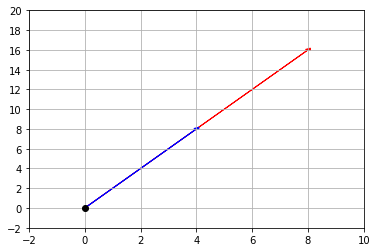

In [0]:
v_dependent1 = np.array([4, 8])
v_dependent2 = np.array([8, 16])

plt.arrow(0, 0, v_dependent2[0], v_dependent2[1], head_width=.2, head_length=.2, color='red')
plt.arrow(0, 0, v_dependent1[0], v_dependent1[1], head_width=.2, head_length=.2, color='blue')
plt.xlim((-2, 10))
plt.ylim((-2, 20))
plt.yticks(list(range(-2, 21, 2)))
plt.grid(True)
plt.plot(0, 0, 'ko')
plt.show()

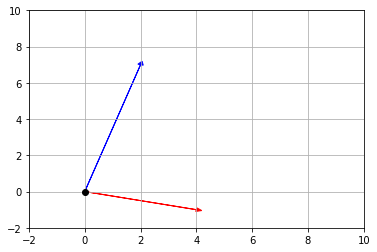

In [0]:
v_independent1 = np.array([2, 7])
v_independent2 = np.array([4, -1])

plt.arrow(0, 0, v_independent2[0], v_independent2[1], head_width=.2, head_length=.2, color='red')
plt.arrow(0, 0, v_independent1[0], v_independent1[1], head_width=.2, head_length=.2, color='blue')
plt.xlim((-2, 10))
plt.ylim((-2, 10))
plt.yticks(list(range(-2, 11, 2)))
plt.grid(True)
plt.plot(0, 0, 'ko')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

these two vectors span the entirety of 1 dimensional space

$\begin{bmatrix}
1 & 2 \\
4 & 8
\end{bmatrix}$
in reduced row echelon form is
$\begin{bmatrix}
1 & 2 \\
0 & 0
\end{bmatrix}$

since the bottom row is all zeros, these vectors are linearly dependent.

since there is only one row with a leading 1, it's rank is 1.

In [0]:
import sympy

In [92]:
g = np.array([1, 2])
h = np.array([4, 8])

gh_matrix = np.array([g, h])
sympy.Matrix(gh_matrix).rref()

(Matrix([
 [1, 2],
 [0, 0]]), (0,))

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

these three vectors span the entirety of 3 dimensional space

$\begin{bmatrix}
1 & 2 & 3 \\
-1 & 0 & 7 \\
4 & 8 & 2
\end{bmatrix}$
in reduced row echelon form is
$\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}$

since the bottom row is not all zeros, none of these vectors are linearly dependent.

since there are three rows with a leading 1, it's rank is 3.

In [95]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

lmn_matrix = np.array([l, m, n])

sympy.Matrix(lmn_matrix).rref()

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]), (0, 1, 2))

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



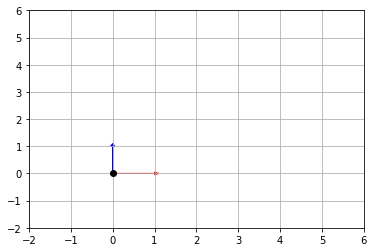

In [97]:
# orthonormal basis
rank2_vector1 = np.array([1, 0])
rank2_vector2 = np.array([0, 1])

plt.arrow(0, 0, rank2_vector1[0], rank2_vector1[1], head_width=.1, head_length=.1, color='red')
plt.arrow(0, 0, rank2_vector2[0], rank2_vector2[1], head_width=.1, head_length=.1, color='blue')
plt.xlim((-2, 6))
plt.ylim((-2, 6))
plt.plot(0, 0, 'ko')
plt.grid(True)
plt.show()

## 6.2 What does it mean to form a basis?

forming a basis means being able to span the entire space for a given dimensionality

to form a basis, the vectors must be linearly independent across all the dimensions

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

$\begin{bmatrix}
1 & 2 & 3 \\
-1 & 0 & 7 \\
4 & 8 & 2
\end{bmatrix}$
in reduced row echelon form is
$\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}$

since there are three rows with a leading 1, it's rank is 3.

In [98]:
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])

sympy.Matrix(P).rref()

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]), (0, 1, 2))

## 7.2 What does the rank of a matrix tell us?

the rank of a matrix tells us how many dimensions can be spanned by its vectors

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

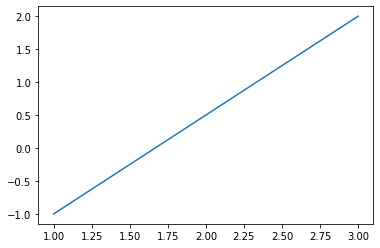

In [106]:
v = np.array([1, 3])
w = np.array([-1, 2])

plt.plot(v, w, '-');

# gonna call it a night here.

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

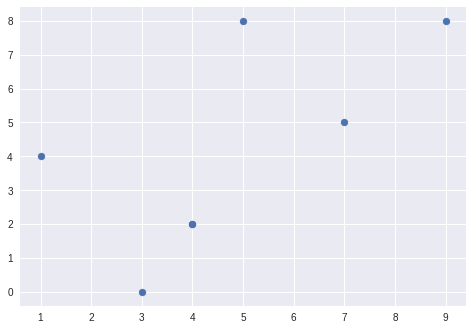

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()